In [1]:
#uvoz knjižnic
import sympy as sym
import numpy as np
import scipy as sp 
import scipy
from scipy.signal import butter
import scipy.signal as signal

import matplotlib.pyplot as plt
import pickle

In [2]:
#uvoz podatkov
testno = np.load('LV balansiranje-testno_stanje.npy',allow_pickle=True)
zacetno = np.load('LV balansiranje-zacetno_stanje.npy',allow_pickle=True)
testno = testno.tolist()
zacetno = zacetno.tolist()
testno_stanje = testno['data']
zacetno_stanje = zacetno['data']

#sortiranje uvoženih podatkov
A_z = zacetno_stanje[:, 0]
B_z = zacetno_stanje[:, 1]
sonda_z = zacetno_stanje[:, 2]
data_zac_dt = zacetno['dt']
zac_cas = np.arange(zacetno['samples'])*data_zac_dt

A_t = testno_stanje[:, 0]
B_t = testno_stanje[:, 1]
sonda_t = testno_stanje[:, 2]
data_test_dt = testno['dt']
test_cas = np.arange(testno['samples'])*data_test_dt

# Signal iz sonde

Text(0, 0.5, 'A [/]')

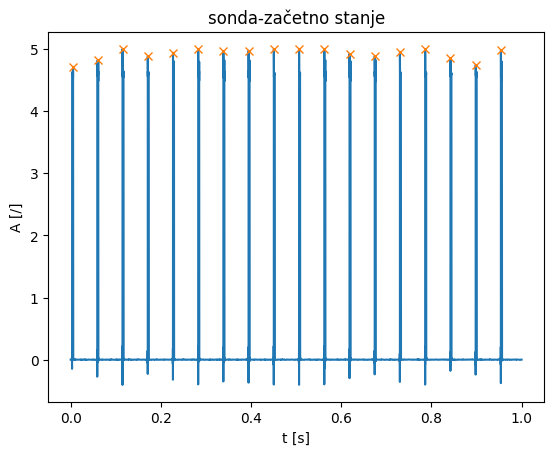

In [3]:
#začetno stanje
plt.title('sonda-začetno stanje')
t = np.linspace(0,1,len(A_z))
plt.plot(t,sonda_z)
vrh1, _ = signal.find_peaks(sonda_z, height=0.5, distance=100)
plt.plot(zac_cas[vrh1], sonda_z[vrh1], 'x')
plt.xlabel('t [s]')
plt.ylabel('A [/]')

In [4]:
#izračun frekvence vrtenja rotorja in določitev ref. položaja za začetno stanje
dt_zac = np.mean(np.diff(zac_cas[vrh1]))
f_zac = 1/dt_zac
fi_zac = np.diff((zac_cas[0], zac_cas[vrh1[0]]))
fi_zac
np.rad2deg(fi_zac), f_zac

(array([0.2999076]), 17.916838205022643)

Text(0, 0.5, 'A [/]')

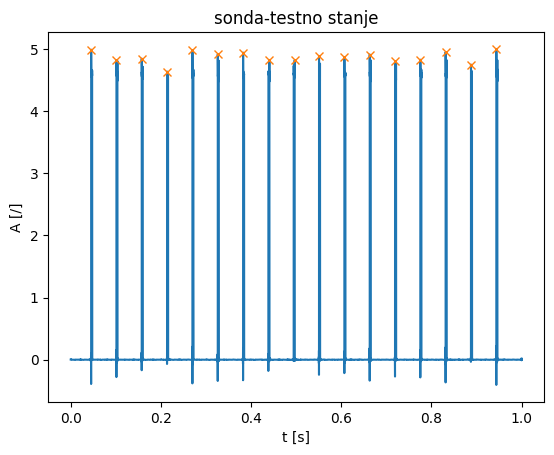

In [5]:
#testno stanje
plt.title('sonda-testno stanje')
plt.plot(t, sonda_t)
vrh2, _ = signal.find_peaks(sonda_t, height=0.5, distance=100)
plt.plot(test_cas[vrh2], sonda_t[vrh2], 'x')
plt.xlabel('t [s]')
plt.ylabel('A [/]')
plt.xlabel('t [s]')
plt.ylabel('A [/]')

In [6]:
#izračun frekvence vrtenja rotorja in določitev ref. položaja za testno stanje
dt_test = np.mean(np.diff(test_cas[vrh2]))
f_test = 1/dt_test
fi_test = np.diff((test_cas[0], test_cas[vrh2[0]]))
fi_test
np.rad2deg(fi_test), f_test

(array([2.60069124]), 17.80637308177194)

In [7]:
#frekvenca razbrana iz zgornjih dveh grafov je približno 18Hz
f_zacetna= 17.9168 #Hz
f_testna= 17.8064 #Hz
#določitev mej filtra, upoštevamo +- 5% za pasovno propustni filter
Nyq = np.size(A_z)/2
sp_z = (17.9168*0.95)/Nyq
zg_z = (17.9168*1.05)/Nyq
sp_t = (17.8064*0.95)/Nyq
zg_t = (17.8064*1.05)/Nyq

# Ležajno mesto A

## Začetno stanje 

Text(0, 0.5, 'a [m/s2]')

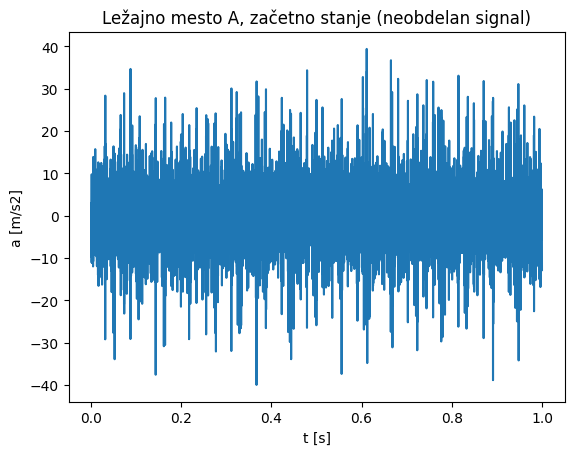

In [8]:
plt.title('Ležajno mesto A, začetno stanje (neobdelan signal)')
plt.plot(t,A_z)
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')

Text(0, 0.5, 'a [m/s2]')

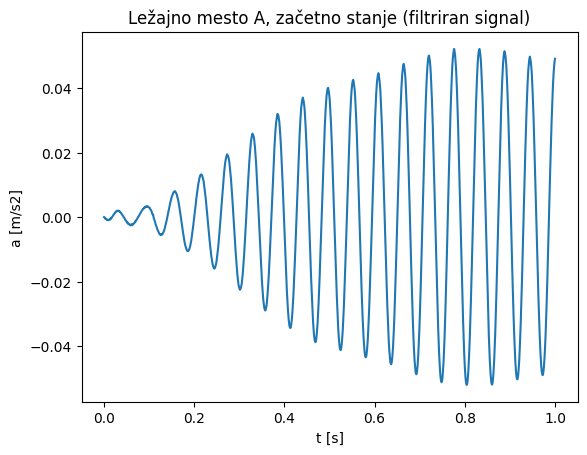

In [9]:
plt.title('Ležajno mesto A, začetno stanje (filtriran signal)')
b, a = scipy.signal.butter(2, [sp_z, zg_z], 'band')
filter_A_z = scipy.signal.lfilter(b, a, A_z)
plt.plot(t,filter_A_z)
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')

Text(0.5, 1.0, 'Amplitudni spekter (začetno stanje A)')

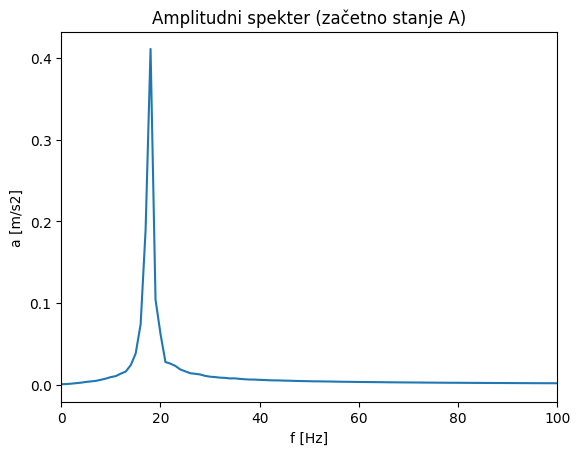

In [10]:
signal_A_z = np.fft.rfft(filter_A_z)
freq_A_z = np.fft.rfftfreq(len(A_z), 1/25600)
plt.plot(freq_A_z,np.abs(signal_A_z/1000))
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('a [m/s2]')
plt.title('Amplitudni spekter (začetno stanje A)')

Text(0.5, 1.0, 'Fazni spekter (začetno stanje A)')

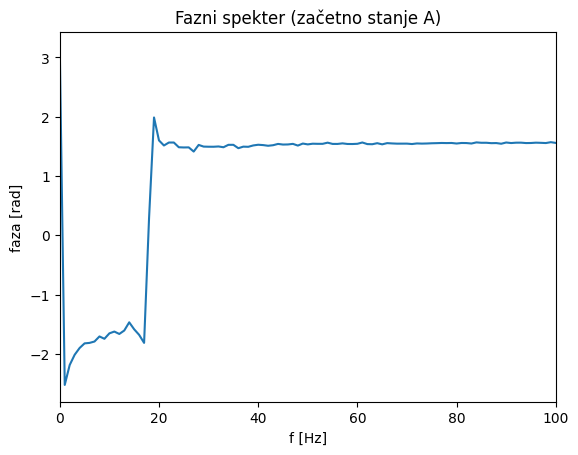

In [11]:
faza_A_z = np.angle(signal_A_z/1000)
plt.plot(freq_A_z,faza_A_z)
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('faza [rad]')
plt.title('Fazni spekter (začetno stanje A)')

In [15]:
A_ua = max(np.abs(signal_A_z/1000)[0:100:1])
fi_ua = faza_A_z[18]
A_ua, fi_ua

(0.411097272035149, 0.2898202447283235)

In [16]:
np.rad2deg(fi_ua)

16.605476840381584

## Testno stanje 

Text(0, 0.5, 'a [m/s2]')

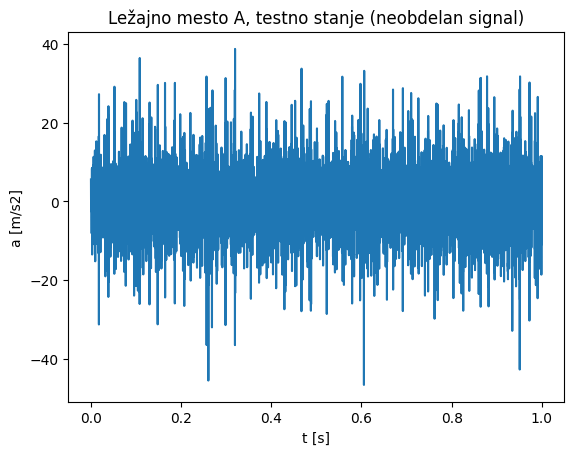

In [17]:
plt.title('Ležajno mesto A, testno stanje (neobdelan signal)')
plt.plot(t,A_t)
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')

Text(0, 0.5, 'a [m/s2]')

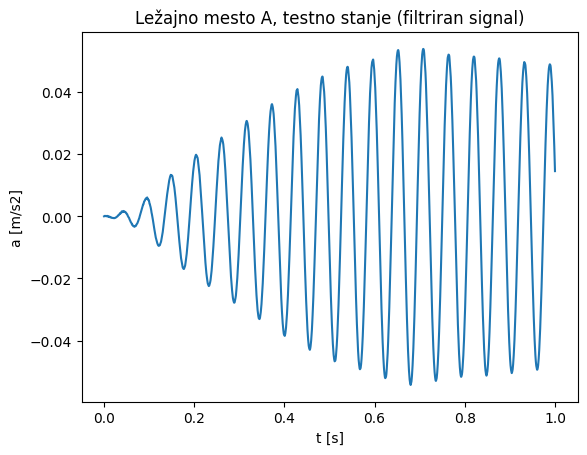

In [18]:
plt.title('Ležajno mesto A, testno stanje (filtriran signal)')
b, a = scipy.signal.butter(2, [sp_t, zg_t], 'band')
filter_A_t = scipy.signal.lfilter(b, a, A_t)
plt.plot(t,filter_A_t)
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')

Text(0.5, 1.0, 'Amplitudni spekter (testno stanje A)')

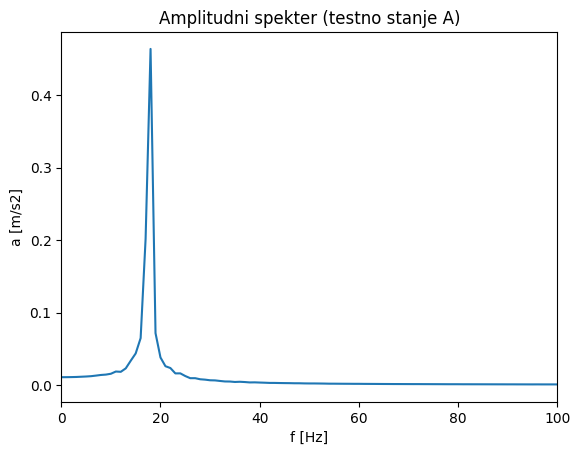

In [19]:
signal_A_t = np.fft.rfft(filter_A_t)
freq_A_t = np.fft.rfftfreq(len(A_t), 1/25600)
plt.plot(freq_A_t,np.abs(signal_A_t/1000))
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('a [m/s2]')
plt.title('Amplitudni spekter (testno stanje A)')

Text(0.5, 1.0, 'Fazni spekter (testno stanje A)')

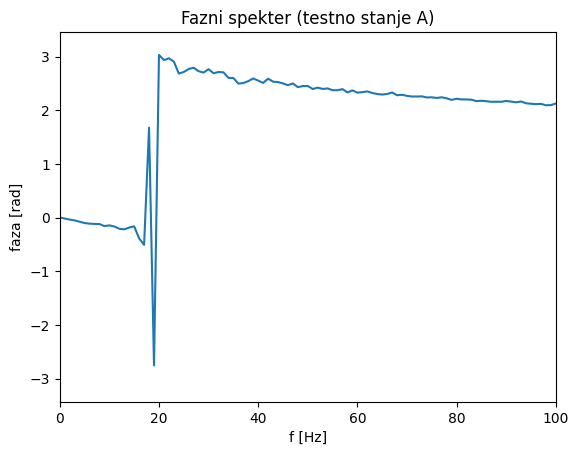

In [20]:
faza_A_t = np.angle(signal_A_t/1000)
plt.plot(freq_A_t,faza_A_t)
plt.xlim(0,100)
plt.xlabel('f [Hz]')
plt.ylabel('faza [rad]')
plt.title('Fazni spekter (testno stanje A)')

In [21]:
A_uwa = max(np.abs(signal_A_t/1000)[0:100:1])
fi_uwa = faza_A_t[18]
A_uwa, fi_uwa

(0.4639354800059626, 1.6749826410019377)

In [22]:
np.rad2deg(fi_uwa)

95.96943608708735

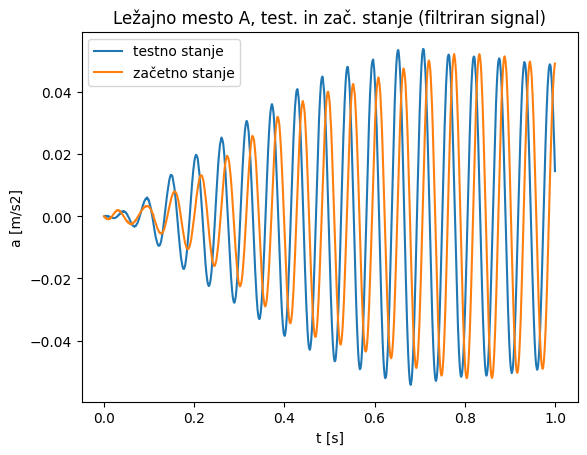

In [23]:
plt.title('Ležajno mesto A, test. in zač. stanje (filtriran signal)')
plt.plot(t,filter_A_t, label = "testno stanje")
plt.plot(t,filter_A_z,  label = "začetno stanje")
plt.xlabel('t [s]')
plt.ylabel('a [m/s2]')
plt.legend()

## Izračun kota in korekcijske mase, A:

In [24]:
AzA = A_ua*np.cos(fi_ua-fi_zac) + 1j*A_ua*np.sin(fi_ua-fi_zac)
AtA = A_uwa*np.cos(fi_uwa-fi_test) + 1j*A_uwa*np.sin(fi_uwa-fi_test)
Q_A = -AzA/(AtA-AzA)
mk_A = abs(Q_A)*2.8
fik_A = np.arctan(Q_A.imag/Q_A.real)
mk_A, fik_A

(array([2.10563423]), array([0.973976]))

In [25]:
np.rad2deg(fik_A)

array([55.80471404])

# Ležajno mesto B

## Začetno stanje

In [26]:
b, a = scipy.signal.butter(2, [sp_z, zg_z], 'band')
filter_B_z = scipy.signal.lfilter(b, a, B_z)
signal_B_z = np.fft.rfft(filter_B_z)
freq_B_z = np.fft.rfftfreq(len(B_z), 1/25600)
faza_B_z = np.angle(signal_B_z/1000)

In [27]:
A_ub = max(np.abs(signal_B_z/1000)[0:100:1])
fi_ub = faza_B_z[18]
A_ub, fi_ub

(0.4849382502073204, 0.038008577224244576)

## Testno stanje

In [28]:
b, a = scipy.signal.butter(2, [sp_t, zg_t], 'band')
filter_B_t = scipy.signal.lfilter(b, a, B_t)
signal_B_t = np.fft.rfft(filter_B_t)
freq_B_t = np.fft.rfftfreq(len(B_t), 1/25600)
faza_B_t = np.angle(signal_B_t/1000)

In [29]:
A_uwb = max(np.abs(signal_B_t/1000)[0:100:1])
fi_uwb = faza_B_t[18]
A_uwb, fi_uwb

(0.40634910087490095, 1.589636357442042)

## Izračun kota in korekcijske mase, B:

In [30]:
AzB = A_ub*np.cos(fi_ub-fi_zac) + 1j*A_ub*np.sin(fi_ub-fi_zac)
AtB = A_uwb*np.cos(fi_uwb-fi_test) + 1j*A_uwb*np.sin(fi_uwb-fi_test)
Q_B = -AzB/(AtB-AzB)
mk_B = abs(Q_B)*2.8
fik_B = np.arctan(Q_B.imag/Q_B.real)
mk_B, fik_B

(array([2.21167358]), array([0.72176483]))

In [31]:
np.rad2deg(fik_B)

array([41.35407837])